# Financial Data Analysis

This notebook analyzes the financial sample data to uncover trends, identify issues, and provide insights for decision-making.


## 1. Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Data


In [2]:
# Load the data from the Excel file
file_path = r'C:\Users\npikw\Downloads\04-01-Financial Sample Data.xlsx'
df = pd.read_excel(file_path)


## 3. Explore Data


In [3]:
### Display the first few rows of the dataset
print(df.head())

### Display information about the dataset
print(df.info())

### Describe the numerical columns
print(df.describe())

      Segment                   Country    Product Discount Band  Units Sold  \
0  Government                    CANADA  Carretera           NaN      1618.5   
1  Government                germany     Carretera           NaN      1321.0   
2  Midmarkets                    FRANCE  Carretera           NaN      2178.0   
3   Midmarket                   Germany  Carretera           NaN       888.0   
4   Midmarket                    Mexico  Carretera           NaN      2470.0   

   Manufacturing Price  Sale Price  Gross Sales  Discounts    Sales     COGS  \
0                  3.0        20.0      32370.0        0.0  32370.0  16185.0   
1                  3.0        20.0      26420.0        0.0  26420.0  13210.0   
2                  3.0        15.0      32670.0        NaN  32670.0  21780.0   
3                  3.0        15.0      13320.0        0.0  13320.0   8880.0   
4                  3.0        15.0      37050.0        0.0  37050.0  24700.0   

    Profit     Date  Month Number Mont

## 4. Data Cleaning


In [88]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicates: {duplicates}")

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values:\n", missing_values)

# Handle missing values as appropriate
# Fill numerical with mean and categorical with mode
df['Profit'].fillna(df['Profit'].mean(), inplace=True)  # Fill missing Profit with mean
df['Discounts'].fillna(df['Discounts'].mean(), inplace=True)  # Fill missing Discounts with mean
df['Discount Band'].fillna(df['Discount Band'].mode()[0], inplace=True)  # Fill missing Discount Band with mode

# Standardize categorical variables if needed
df['Country'] = df['Country'].str.strip().str.title()  # Standardizing country names

# Display results after cleaning
print(f"\nNumber of duplicates after cleaning: {df.duplicated().sum()}")
print("\nMissing values after cleaning:\n", df.isnull().sum())




Number of duplicates: 0

Missing values:
 Segment                1
Country                1
Product                1
Discount Band          0
Units Sold             1
Manufacturing Price    1
Sale Price             1
Gross Sales            1
Discounts              0
Sales                  1
COGS                   1
Profit                 0
Date                   1
Month Number           1
Month Name             1
Year                   1
Profit Margin          1
dtype: int64

Number of duplicates after cleaning: 0

Missing values after cleaning:
 Segment                1
Country                1
Product                1
Discount Band          0
Units Sold             1
Manufacturing Price    1
Sale Price             1
Gross Sales            1
Discounts              0
Sales                  1
COGS                   1
Profit                 0
Date                   1
Month Number           1
Month Name             1
Year                   1
Profit Margin          1
dtype: int64


## 5. Data Analysis


In [84]:
## Calculate total profit by product
profit_by_product = df.groupby('Product')['Profit'].sum().reset_index()  
print(profit_by_product)

     Product       Profit
0   Amarilla  2814104.060
1  Carretera  1826804.885
2    Montana  2114754.880
3      Paseo  4797437.950
4        VTT  3034608.020
5       Velo  2305992.465


### 5.1 Visualization: Profit by Product


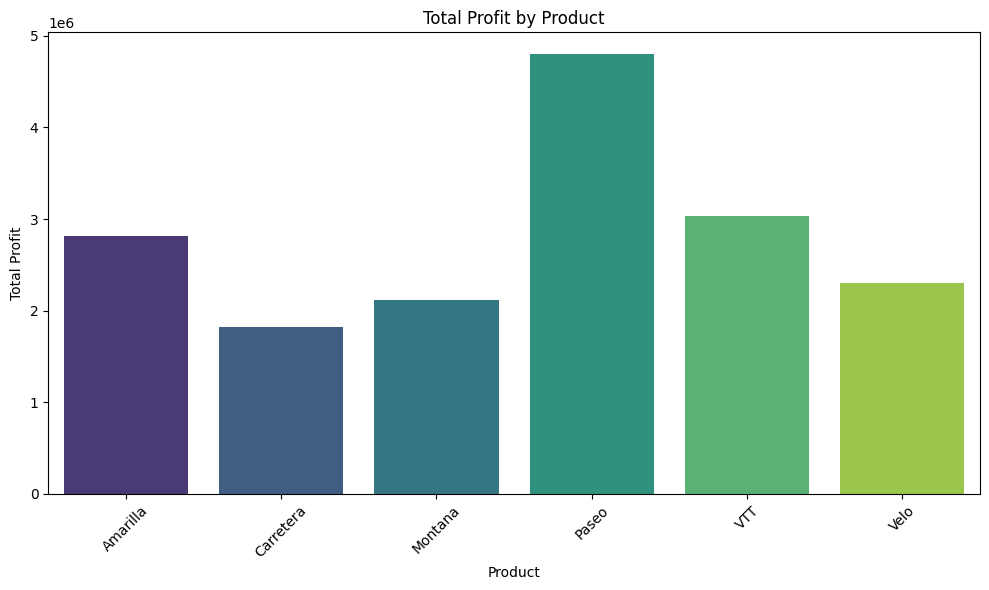

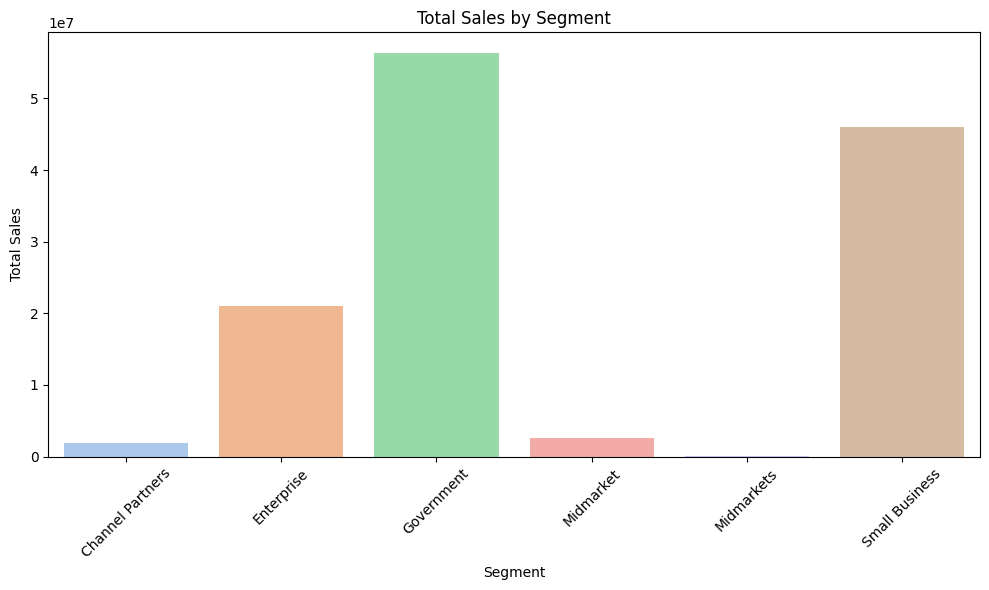

In [86]:
### Visualization: Profit by Product
plt.figure(figsize=(10, 6))
sns.barplot(data=profit_by_product, x='Product', y='Profit', palette='viridis', hue='Product', legend=False)  # Added hue here
plt.title('Total Profit by Product')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate total sales by segment
sales_by_segment = df.groupby('Segment')['Gross Sales'].sum().reset_index()

### Visualization: Total Sales by Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_segment, x='Segment', y='Gross Sales', palette='pastel', hue='Segment')  # Added hue here
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

### 5.2 Average Profit Margin Calculation

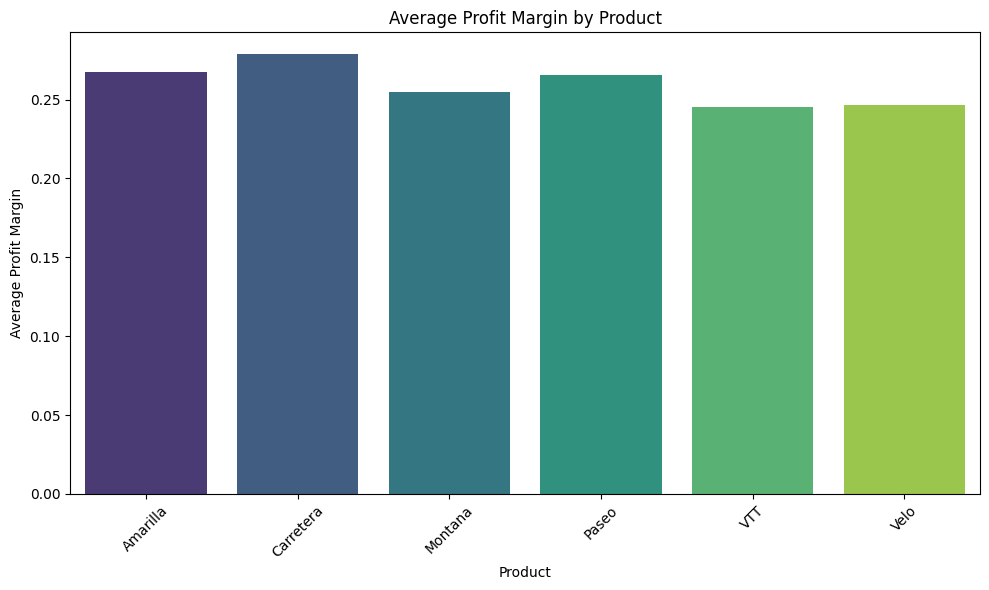

In [87]:
### Average Profit Margin Calculation
df['Profit Margin'] = df['Profit'] / df['Gross Sales']

### Average Profit Margin by Product
avg_profit_margin_by_product = df.groupby('Product')['Profit Margin'].mean().reset_index()

### Visualization: Average Profit Margin by Product
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_profit_margin_by_product, x='Product', y='Profit Margin', hue='Product', palette='viridis')  # Added hue here
plt.title('Average Profit Margin by Product')
plt.xlabel('Product')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Group Analysis

Total Sales by Segment:
             Segment         Sales
0  Channel Partners  1.800594e+06
1        Enterprise  1.961169e+07
2        Government  5.250426e+07
3         Midmarket  2.349213e+06
4        Midmarkets  3.267000e+04
5    Small Business  4.242792e+07


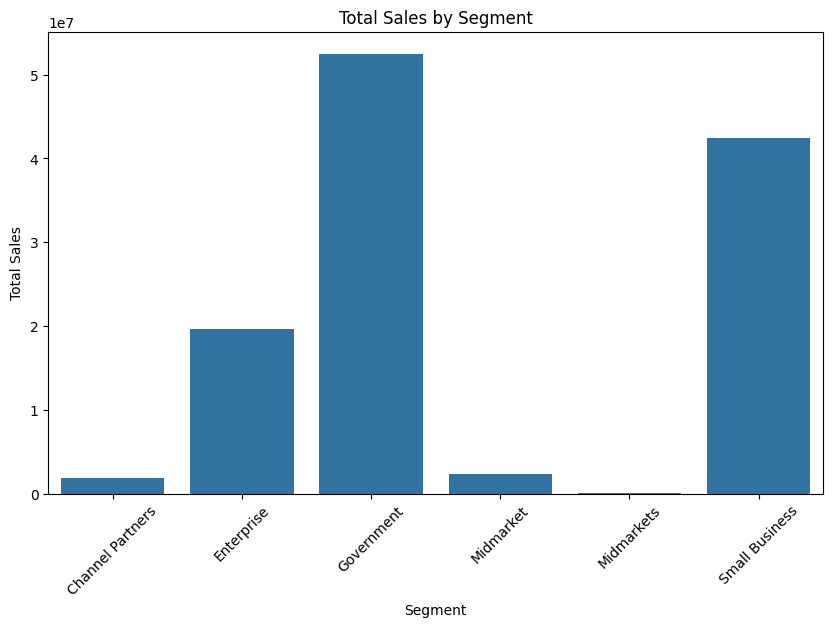

In [76]:
## Group by 'Segment' and calculate total sales
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
print("Total Sales by Segment:\n", segment_sales)

## Bar plot for total sales by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=segment_sales)
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


### 7. Outliers



Summary Statistics for Sales:
 count    7.000000e+02
mean     1.696091e+05
std      2.367263e+05
min      1.655080e+03
25%      1.592800e+04
50%      3.554020e+04
75%      2.610775e+05
max      1.159200e+06
Name: Sales, dtype: float64


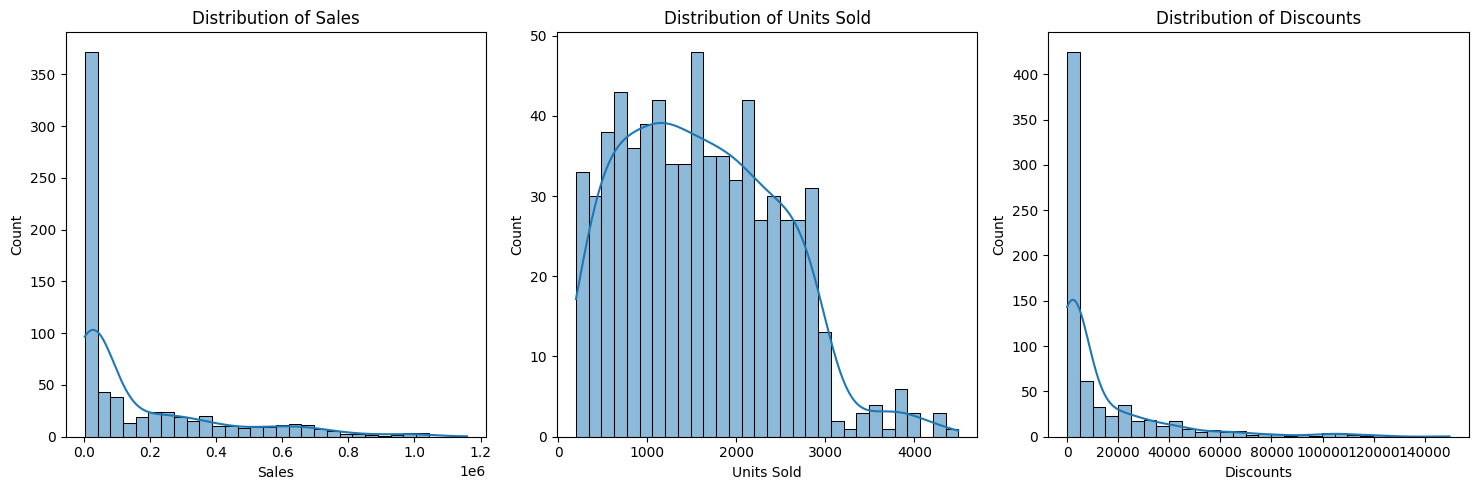

In [89]:
# Summary statistics for Sales
print("\nSummary Statistics for Sales:\n", df['Sales'].describe())

# Visualize distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')

plt.subplot(1, 3, 2)
sns.histplot(df['Units Sold'], bins=30, kde=True)
plt.title('Distribution of Units Sold')

plt.subplot(1, 3, 3)
sns.histplot(df['Discounts'], bins=30, kde=True)
plt.title('Distribution of Discounts')

plt.tight_layout()
plt.show()

### 8. Correlation Analysis

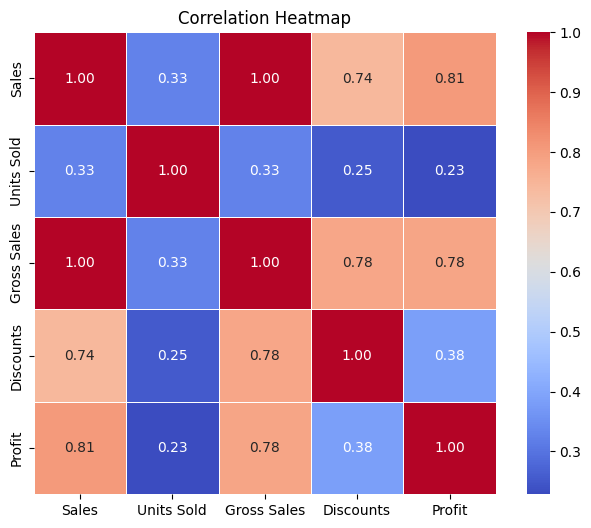

In [79]:
## Calculate correlation matrix
correlation_matrix = df[['Sales', 'Units Sold', 'Gross Sales', 'Discounts', 'Profit']].corr()

### Visualization: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, 
            linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()



### Insights:
- Highest profit is generated from the 'Paseo' product.
- 'Government' segment has the highest total sales.
- There is a strong positive correlation between 'Sales' and 'Gross Sales', indicating that higher sales lead to higher gross revenue.
- A notable negative correlation exists between 'Discounts' and 'Profit', suggesting that higher discounts may reduce overall profitability.

### Summary of Key Findings
1. The total profit by product indicates which products are driving profitability.
2. Sales by segment reveal the most lucrative customer segments.
3. The average profit margin by product highlights products with the best profitability relative to sales.
4. Correlation analysis shows relationships between key variables, such as the strong correlation between Sales and Profit.

### Recommendations
1. Focus marketing efforts on high-profit products to maximize returns.
2. Analyze customer preferences in the most profitable segments to tailor product offerings.
3. Consider strategies to improve the profit margins of lower-performing products.
4. Monitor sales trends and adjust pricing strategies accordingly.

### Future Analysis Opportunities
1. Conduct forecasting to predict future sales trends and demand.
2. Perform segmentation analysis to understand customer behavior better.
3. Dive deeper into specific countries to identify region-specific trends.
4. Explore product line performance over time to make data-driven decisions.

In [90]:
# Save cleaned data for future analysis
df.to_csv('cleaned_financial_data.csv', index=False)
print("Data analysis completed. Cleaned data saved as 'cleaned_financial_data.csv'.")

Data analysis completed. Cleaned data saved as 'cleaned_financial_data.csv'.
